# DAVLAB
#Btech cse stream
## Name : RIJAN_CA_240962035
#Roll no:61
# Week-10&11 Excercise

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("transaction_data.csv")
df

,Transaction ID,Sender Account ID,Receiver Account ID,Transaction Amount,Transaction Type,Timestamp,Transaction Status,Fraud Flag,Geolocation (Latitude/Longitude),Device Used
0,TXN9520068950,ACC14994,ACC16656,495.90,Deposit,1/17/2025 10:14,Failed,True,"34.0522 N, -74.006 W",Desktop
1,TXN9412011085,ACC58958,ACC32826,529.62,Withdrawal,1/17/2025 10:51,Success,False,"35.6895 N, -118.2437 W",Mobile
2,TXN4407425052,ACC56321,ACC92481,862.47,Withdrawal,1/17/2025 10:50,Failed,False,"48.8566 N, 2.3522 W",Mobile
3,TXN2214150284,ACC48650,ACC76457,1129.88,Transfer,1/17/2025 10:56,Success,True,"34.0522 N, -74.006 W",Mobile
4,TXN4247571145,ACC60921,ACC11419,933.24,Deposit,1/17/2025 10:25,Success,True,"55.7558 N, 37.6173 W",Mobile
...,...,...,...,...,...,...,...,...,...,...
995,TXN7395336359,ACC79886,ACC14903,1340.76,Transfer,1/17/2025 10:49,Success,False,"35.6895 N, -118.2437 W",Mobile
996,TXN2215717837,ACC95972,ACC50750,483.36,Withdrawal,1/17/2025 11:00,Failed,True,"55.7558 N, 37.6173 W",Mobile
997,TXN1676848215,ACC95938,ACC18507,199.81,Withdrawal,1/17/2025 10:54,Success,False,"34.0522 N, 139.6917 W",Desktop
998,TXN2479413280,ACC76523,ACC95234,1341.86,Transfer,1/17/2025 10:59,Success,True,"51.5074 N, 139.6917 W",Mobile


In [8]:
# 1. Data Exploration and Loading
def explore_data(df):
    print("Data Exploration:")
    print("Shape:", df.shape)
    print("Info:", df.info())
    print("Describe:", df.describe())
    print("Head:", df.head())
    print("Missing Values:", df.isnull().sum())


explore_data(df)

Data Exploration:
Shape: (1000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction ID                    1000 non-null   object 
 1   Sender Account ID                 1000 non-null   object 
 2   Receiver Account ID               1000 non-null   object 
 3   Transaction Amount                1000 non-null   float64
 4   Transaction Type                  1000 non-null   object 
 5   Timestamp                         1000 non-null   object 
 6   Transaction Status                1000 non-null   object 
 7   Fraud Flag                        1000 non-null   bool   
 8   Geolocation (Latitude/Longitude)  1000 non-null   object 
 9   Device Used                       1000 non-null   object 
dtypes: bool(1), float64(1), object(8)
memory usage: 71.4+ KB
Info: None
Describe:        Transaction 

In [9]:
# 2. Data Cleaning
def clean_data(df):
    print("\nData Cleaning:")
    #Handle missing values (filling NaN in 'Device Used' with 'Unknown')
    df['Device Used'] = df['Device Used'].fillna('Unknown')

    #Handle outliers in Transaction Amount (remove values beyond 3 std)
    mean_amount = df['Transaction Amount'].mean()
    std_amount = df['Transaction Amount'].std()
    df = df[(df['Transaction Amount'] >= mean_amount - 3*std_amount) &
            (df['Transaction Amount'] <= mean_amount + 3*std_amount)]

    return df

df_cleaned = clean_data(df.copy()) # Clean a copy to compare
df_cleaned


Data Cleaning:


,Transaction ID,Sender Account ID,Receiver Account ID,Transaction Amount,Transaction Type,Timestamp,Transaction Status,Fraud Flag,Geolocation (Latitude/Longitude),Device Used
0,TXN9520068950,ACC14994,ACC16656,495.90,Deposit,1/17/2025 10:14,Failed,True,"34.0522 N, -74.006 W",Desktop
1,TXN9412011085,ACC58958,ACC32826,529.62,Withdrawal,1/17/2025 10:51,Success,False,"35.6895 N, -118.2437 W",Mobile
2,TXN4407425052,ACC56321,ACC92481,862.47,Withdrawal,1/17/2025 10:50,Failed,False,"48.8566 N, 2.3522 W",Mobile
3,TXN2214150284,ACC48650,ACC76457,1129.88,Transfer,1/17/2025 10:56,Success,True,"34.0522 N, -74.006 W",Mobile
4,TXN4247571145,ACC60921,ACC11419,933.24,Deposit,1/17/2025 10:25,Success,True,"55.7558 N, 37.6173 W",Mobile
...,...,...,...,...,...,...,...,...,...,...
995,TXN7395336359,ACC79886,ACC14903,1340.76,Transfer,1/17/2025 10:49,Success,False,"35.6895 N, -118.2437 W",Mobile
996,TXN2215717837,ACC95972,ACC50750,483.36,Withdrawal,1/17/2025 11:00,Failed,True,"55.7558 N, 37.6173 W",Mobile
997,TXN1676848215,ACC95938,ACC18507,199.81,Withdrawal,1/17/2025 10:54,Success,False,"34.0522 N, 139.6917 W",Desktop
998,TXN2479413280,ACC76523,ACC95234,1341.86,Transfer,1/17/2025 10:59,Success,True,"51.5074 N, 139.6917 W",Mobile


In [10]:
# 3. Data Summarization
def summarize_data(df_before, df_after):
    print("\nData Summary Before Cleaning:")
    print(df_before.describe())

    print("\nData Summary After Cleaning:")
    print(df_after.describe())

summarize_data(df, df_cleaned)


Data Summary Before Cleaning:
       Transaction Amount
count          1000.00000
mean            771.16529
std             411.01925
min              51.89000
25%             423.34750
50%             761.65500
75%            1122.67250
max            1497.76000

Data Summary After Cleaning:
       Transaction Amount
count          1000.00000
mean            771.16529
std             411.01925
min              51.89000
25%             423.34750
50%             761.65500
75%            1122.67250
max            1497.76000


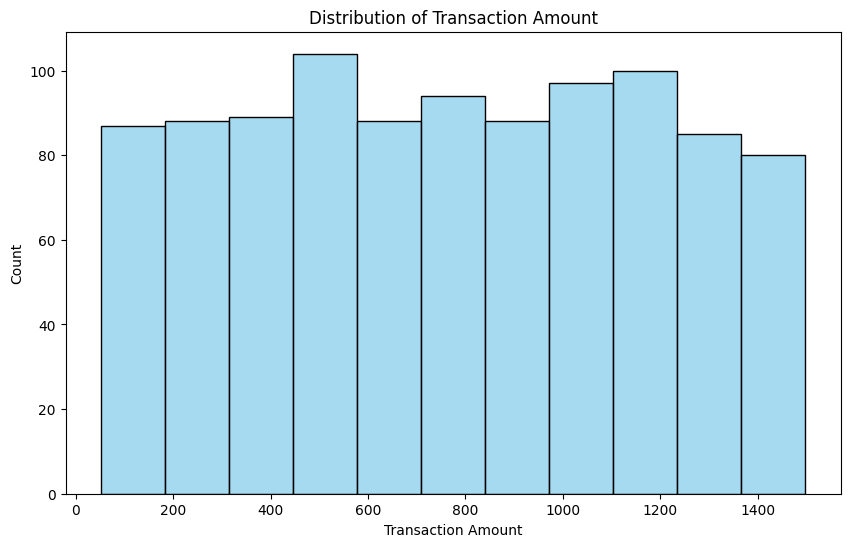

In [11]:
def visualize_and_analyze(df):
    # Distribution of Transaction Amount
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Transaction Amount'],color="skyblue")
    plt.title('Distribution of Transaction Amount')
    plt.show()
    
visualize_and_analyze(df_cleaned)

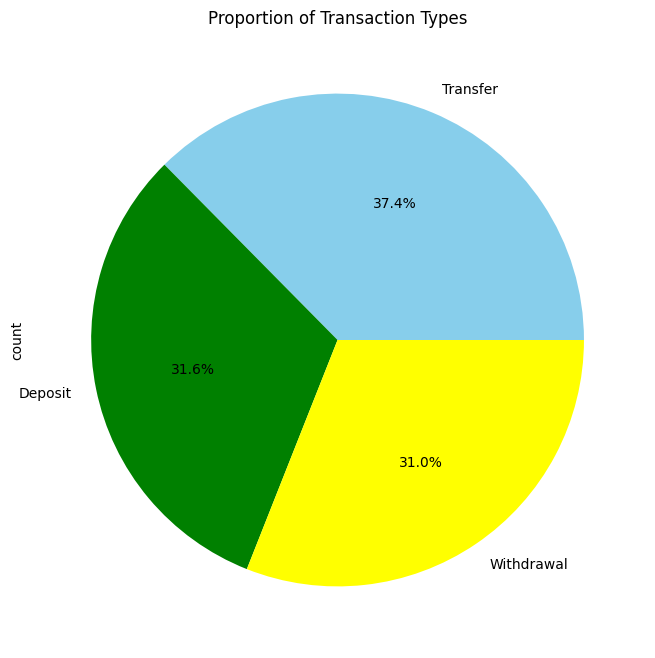

In [12]:
def visualize_and_analyze(df):
    plt.figure(figsize=(8, 8))
    df['Transaction Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'green', 'yellow'])
    plt.title('Proportion of Transaction Types')
    plt.show()
    
visualize_and_analyze(df_cleaned)

In [13]:
def visualize_and_analyze(df):
    fraud_counts = df['Fraud Flag'].value_counts() 
    fraud_percentage = (fraud_counts[True] / fraud_counts.sum()) * 100  
    print(f"\nPercentage of Fraudulent Transactions: {fraud_percentage:.2f}%")
visualize_and_analyze(df_cleaned)


Percentage of Fraudulent Transactions: 48.10%


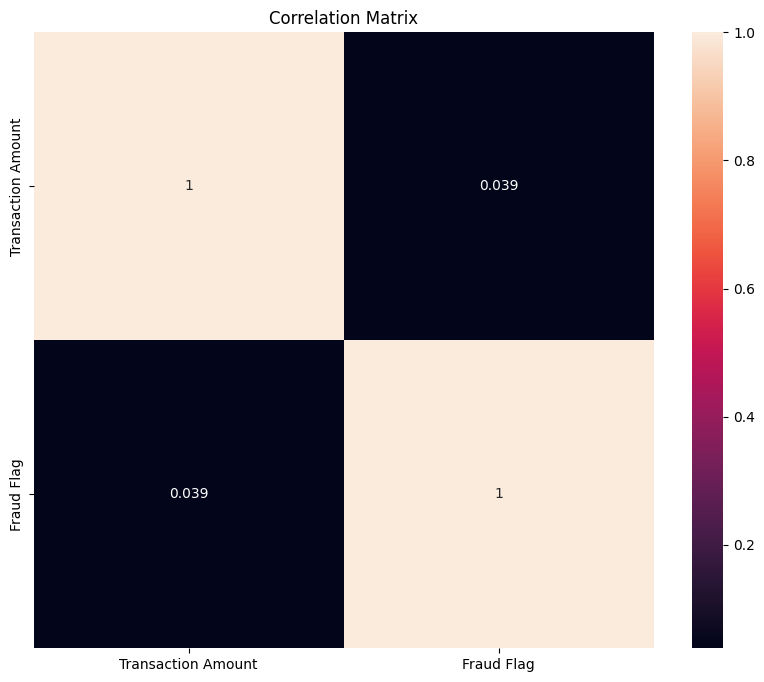

In [14]:
def visualize_and_analyze(df):
    numeric_df = df[['Transaction Amount', 'Fraud Flag']]
    correlation_matrix = numeric_df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix,annot=True)
    plt.title('Correlation Matrix')
    plt.show()
visualize_and_analyze(df_cleaned)

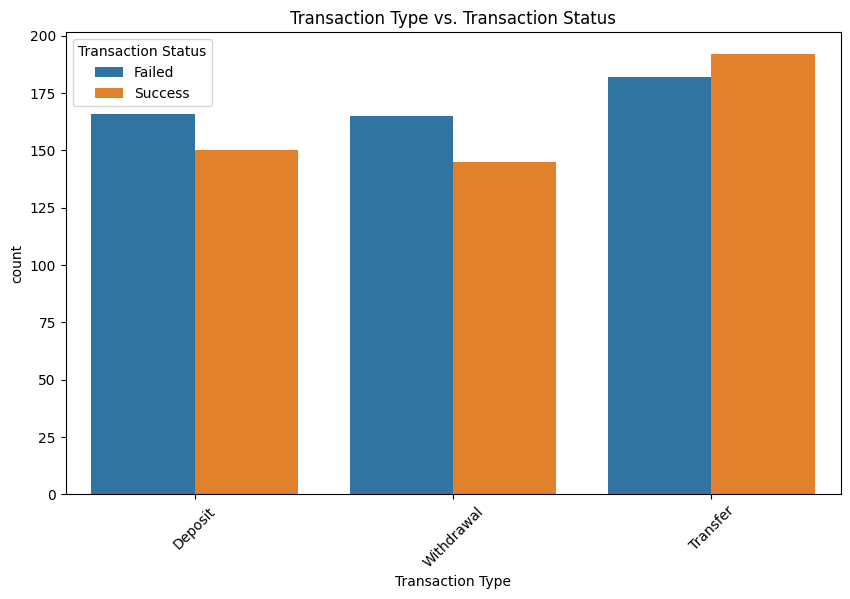

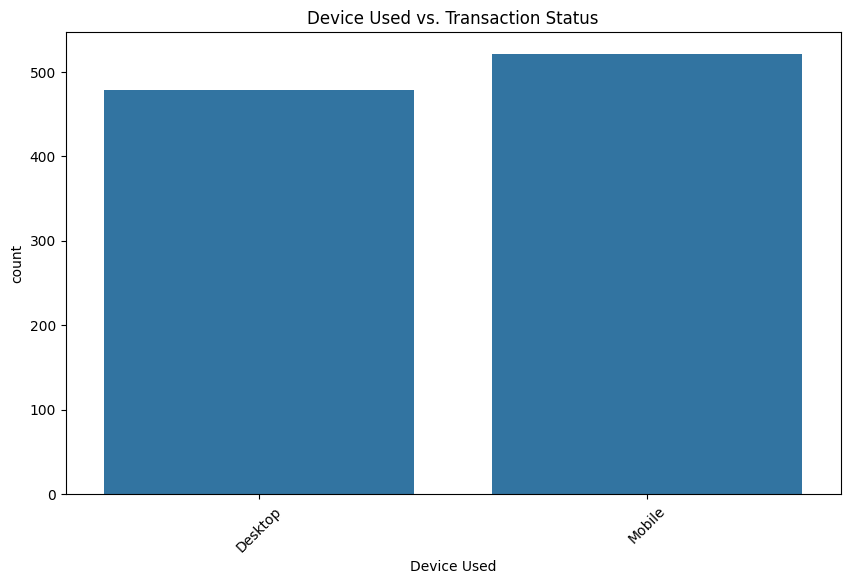

In [15]:
# 4. Data Visualization and Analysis
def visualize_and_analyze(df):
    # Transaction Type vs. Transaction Status
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Transaction Type', hue='Transaction Status', data=df)
    plt.title('Transaction Type vs. Transaction Status')
    plt.xticks(rotation=45)
    plt.show()

    # Device Used vs. Transaction Status
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Device Used', data=df)
    plt.title('Device Used vs. Transaction Status')
    plt.xticks(rotation=45)
    plt.show()

visualize_and_analyze(df_cleaned)

In [16]:
#Question 5: What is the average transaction amount for each transaction type?
avg_transaction_amount = df.groupby('Transaction Type')['Transaction Amount'].mean()
print("\nAverage Transaction Amount by Transaction Type:")
print(avg_transaction_amount)


Average Transaction Amount by Transaction Type:
Transaction Type
Deposit       797.603228
Transfer      780.151203
Withdrawal    733.374581
Name: Transaction Amount, dtype: float64


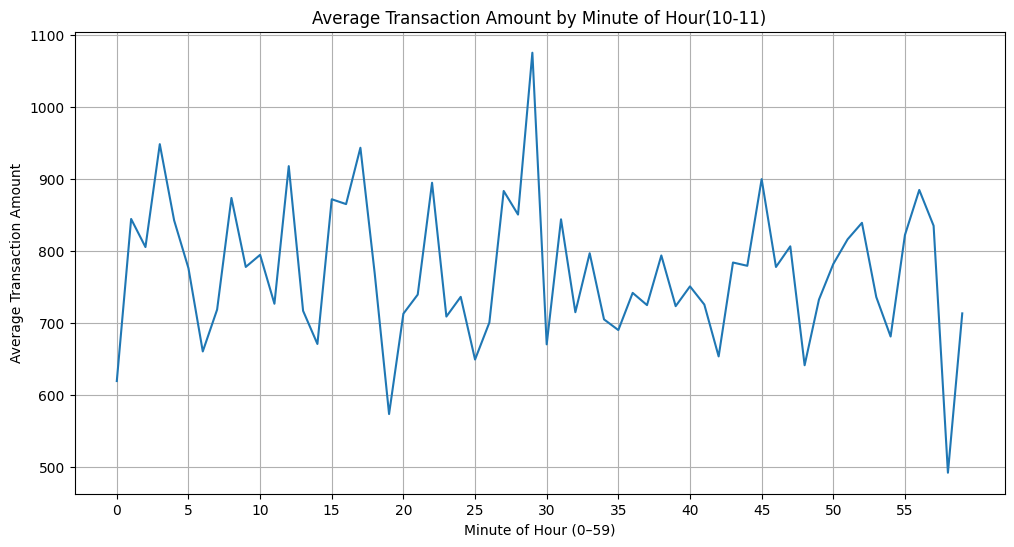


Average Transaction Amount by Minute of Hour:

Minute
0      619.427059
1      844.312222
2      805.325000
3      948.071176
4      842.407647
5      776.047619
6      660.498824
7      718.553333
8      873.442500
9      777.746250
10     794.533077
11     726.670000
12     917.593333
13     716.856471
14     670.873000
15     871.651111
16     864.927368
17     943.114091
18     768.403571
19     573.670000
20     712.918571
21     739.396000
22     894.529375
23     708.913182
24     736.264091
25     649.286800
26     700.675000
27     883.127222
28     850.400000
29    1074.930000
30     670.364667
31     843.792941
32     714.922222
33     796.761818
34     705.007059
35     690.155882
36     741.742778
37     724.805000
38     793.658421
39     723.321333
40     750.797500
41     725.570000
42     653.607143
43     783.871818
44     779.323846
45     899.541333
46     777.712632
47     806.348824
48     641.377333
49     732.458571
50     781.790000
51     816.100000
52     83

In [28]:
# 6: Analyzing the transaction amounts by time of day
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Minute'] = df['Timestamp'].dt.minute
avg_amount_by_minute = df.groupby('Minute')['Transaction Amount'].mean()
plt.figure(figsize=(12, 6))
plt.plot(avg_amount_by_minute.index, avg_amount_by_minute.values)
plt.title('Average Transaction Amount by Minute of Hour(10-11)')
plt.xlabel('Minute of Hour (0–59)')
plt.ylabel('Average Transaction Amount')
plt.xticks(range(0, 60, 5))  
plt.grid(True)
plt.show()
print("\nAverage Transaction Amount by Minute of Hour:\n")
print(avg_amount_by_minute)


In [18]:
# Question 7: Which sender and receiver accounts have the highest transaction volumes?
def top_accounts_by_volume(df):
   
  sender_volumes = df['Sender Account ID'].value_counts().head(10)  # Top 10 senders
  receiver_volumes = df['Receiver Account ID'].value_counts().head(10) # Top 10 receivers

  print("\nTop 10 Senders by Transaction Volume:")
  print(sender_volumes)

  print("\nTop 10 Receivers by Transaction Volume:")
  print(receiver_volumes)

top_accounts_by_volume(df)


Top 10 Senders by Transaction Volume:
Sender Account ID
ACC89865    2
ACC82828    2
ACC50985    2
ACC75741    2
ACC71245    2
ACC37810    2
ACC48650    1
ACC60921    1
ACC18381    1
ACC43792    1
Name: count, dtype: int64

Top 10 Receivers by Transaction Volume:
Receiver Account ID
ACC51744    2
ACC85405    2
ACC51253    2
ACC36934    2
ACC17647    2
ACC76710    2
ACC53580    1
ACC21980    1
ACC92481    1
ACC76457    1
Name: count, dtype: int64



Average Transaction Amount by Device Used:
Device Used
Desktop    768.175699
Mobile     773.913877
Name: Transaction Amount, dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_6072\548053750.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


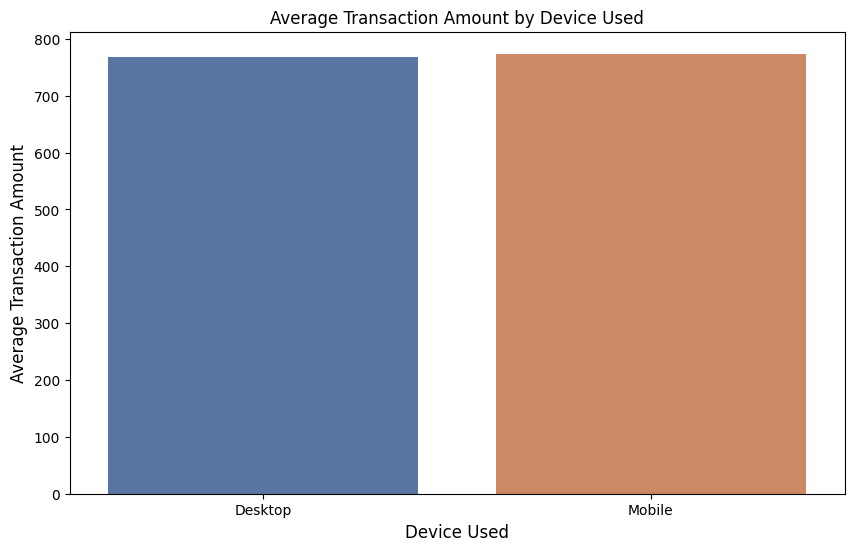

In [33]:
# 8.How does device usage correlate with the average transaction amount?
# Group and print
avg_amount_by_device = df.groupby('Device Used')['Transaction Amount'].mean()
print("\nAverage Transaction Amount by Device Used:")
print(avg_amount_by_device)
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Device Used', 
    y='Transaction Amount', 
    data=df, 
    errorbar=None,
    palette='deep' 
)
plt.title('Average Transaction Amount by Device Used')
plt.xlabel('Device Used', fontsize=12)
plt.ylabel('Average Transaction Amount', fontsize=12)
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_6072\2355733310.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Device Used', y='Transaction Amount', data=df, palette='deep')


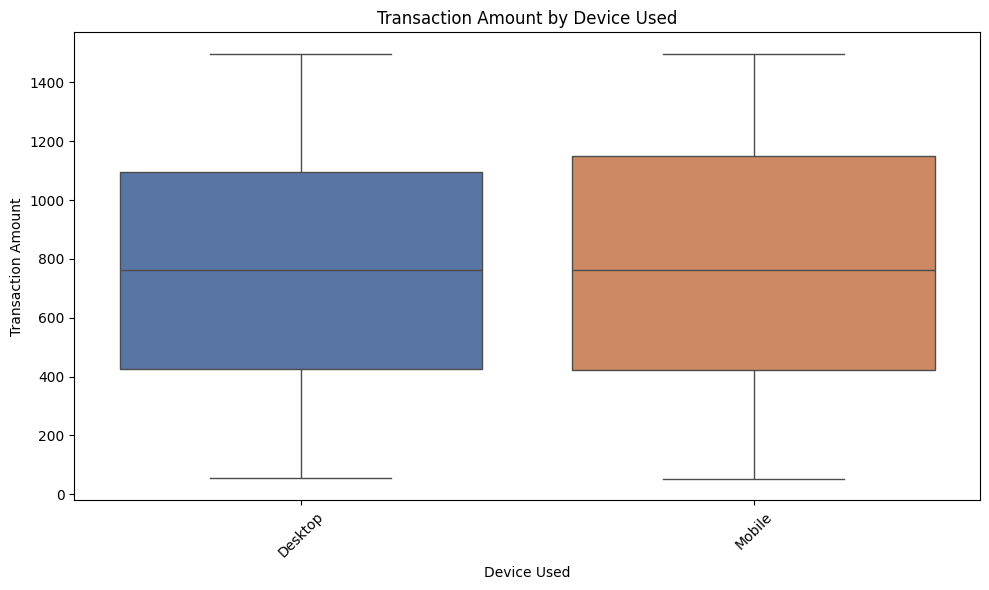


Average Transaction Amount by Device Used:

Device Used
Desktop    768.175699
Mobile     773.913877
Name: Transaction Amount, dtype: float64


In [35]:
# 9.Investigating the relationship between device usage and transaction amount
# Boxplot: Transaction Amount by Device Used
plt.figure(figsize=(10, 6))
sns.boxplot(x='Device Used', y='Transaction Amount', data=df, palette='deep')
plt.title('Transaction Amount by Device Used')
plt.xlabel('Device Used')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
avg_amount_by_device = df.groupby('Device Used')['Transaction Amount'].mean()
print("\nAverage Transaction Amount by Device Used:\n")
print(avg_amount_by_device)


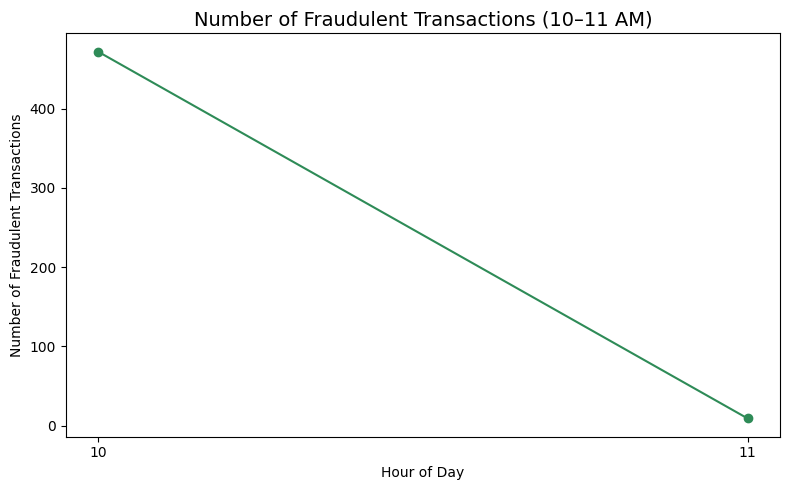

In [36]:
# 10. Analyze trends in fraud occurrences over time
df_time_fraud = df[df['Fraud Flag'] == True].copy()
df_time_fraud['Timestamp'] = pd.to_datetime(df_time_fraud['Timestamp'])
df_time_fraud['Hour'] = df_time_fraud['Timestamp'].dt.hour
fraud_10_11 = df_time_fraud[df_time_fraud['Hour'].isin([10, 11])]
hourly_counts = fraud_10_11.groupby('Hour').size()
plt.figure(figsize=(8, 5))
plt.plot(hourly_counts.index, hourly_counts.values, color='seagreen', marker='o')
plt.title('Number of Fraudulent Transactions (10–11 AM)', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(hourly_counts.index)
plt.tight_layout()
plt.show()


In [37]:
# 11.Analyzing the average transaction amount for each sender and receiver account. Identify the top 10 sender and receiver accounts with the highest average transaction amounts
avg_sender_amount = df.groupby('Sender Account ID')['Transaction Amount'].mean()
top_10_senders = avg_sender_amount.sort_values(ascending=False).head(10)
print("\nTop 10 Senders by Average Transaction Amount:\n")
print(top_10_senders)
avg_receiver_amount = df.groupby('Receiver Account ID')['Transaction Amount'].mean()
top_10_receivers = avg_receiver_amount.sort_values(ascending=False).head(10)
print("\n\nTop 10 Receivers by Average Transaction Amount:\n")
print(top_10_receivers)


Top 10 Senders by Average Transaction Amount:

Sender Account ID
ACC44804    1497.76
ACC67128    1495.01
ACC76875    1494.20
ACC14340    1494.03
ACC47545    1494.01
ACC76710    1493.86
ACC52161    1493.27
ACC75685    1488.93
ACC28678    1485.37
ACC16531    1485.22
Name: Transaction Amount, dtype: float64


Top 10 Receivers by Average Transaction Amount:

Receiver Account ID
ACC26269    1497.76
ACC77786    1495.01
ACC22724    1494.20
ACC33467    1494.03
ACC63108    1494.01
ACC62664    1493.86
ACC74234    1493.27
ACC92454    1488.93
ACC21230    1485.37
ACC41695    1485.22
Name: Transaction Amount, dtype: float64
